In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [5]:
#Reading Mouse Drug Data File
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [6]:
#Reading data from the Cinical Trial sheet
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
clinical_trial

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
#Merging the two data files into one dataset
mouse_clinical_data = pd.merge(clinical_trial, mouse_drug_data, how="left", on=['Mouse ID','Mouse ID'])

#Displaying the table for preview
mouse_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [8]:
#Calculating the Mean Tumor VOlume  grouped by Drug and Timepoint
meanTumor = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

#Converting the series into a dataframe
tumorVolMean = pd.DataFrame(meanTumor).reset_index()

#Displaying the dataframe
tumorVolMean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
#Calculating the Standard Error of Tumor Volumes grouped by Drug and TImepoint
standardTumor = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

#Storing the data into a dataframe
standardErrTumor = pd.DataFrame(standardTumor).reset_index()

#Displaying the dataframe
standardErrTumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
#Re-Formatting the Mean Volume dataframe
#Got this attrivute from "https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77"
formatted_tumorMean = tumorVolMean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#Displaying the formatted dataframe
formatted_tumorMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [57]:
#Re-Formatting the Standard Error Volume dataframe
formatted_standarderr = standardErrTumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#Displaying the dataframe
formatted_standarderr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


<IPython.core.display.Javascript object>


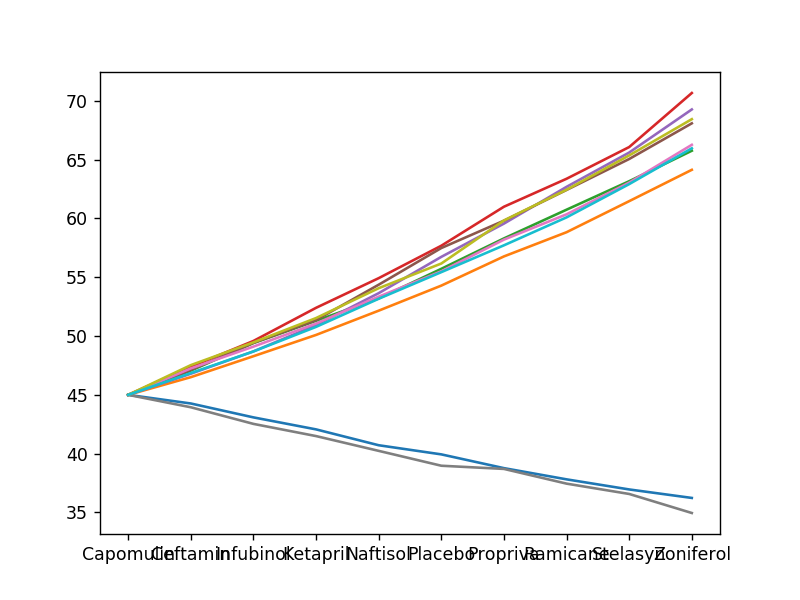

In [60]:
#Creating the PLot(with Error bars)
fig = plt.figure()
x = formatted_tumorMean.index
y = formatted_tumorMean.values
yerr = formatted_standarderr.values
plt.plot(x,y)

In [32]:
plt.show()

In [56]:
plt.xlim(0,50)
plt.ylim(30,80)

(30, 80)

In [63]:
treatmentLabels = formatted_tumorMean.columns

plt.xticks(x, treatmentLabels, rotation='horizontal')

([<matplotlib.axis.XTick at 0x1b7592c1f60>,
 <a list of 10 Text xticklabel objects>)

In [65]:
plt.subplot(111)